In [2]:
! pip3 install opencv-python numpy matplotlib imutils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

In [4]:
# read the image
img = cv2.imread("the_floor.jpg")

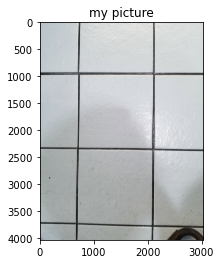

In [5]:
# display image that was read in
plt.imshow(img)
plt.title('my picture')
plt.show()

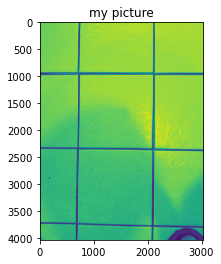

In [6]:
# convert to grayscale
grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale)
plt.title('my picture')
plt.show()

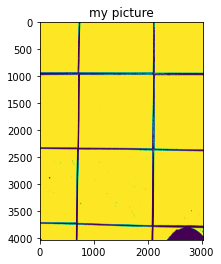

In [7]:
(thresh, blackAndWhiteImage) = cv2.threshold(grayscale, 130, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage)
plt.title('my picture')
plt.show()

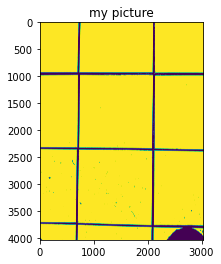

In [8]:
#Blend then convert to black and white again
# It might be helpful to use this once to reduce noise (with a regular threshhold)
# Then again to strengthen black lines (with a high threshhold)
kernel = np.ones((5,5),np.float32)/25
blended = cv2.filter2D(blackAndWhiteImage,-1,kernel)
(thresh, adjustedBlackAndWhiteImage) = cv2.threshold(blended, 220, 255, cv2.THRESH_BINARY)
plt.imshow(adjustedBlackAndWhiteImage)
plt.title('my picture')
plt.show()

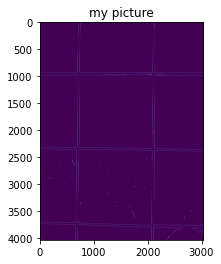

In [9]:
# perform edge detection
edges = cv2.Canny(adjustedBlackAndWhiteImage, 30, 100)
plt.imshow(edges)
plt.title('my picture')
plt.show()

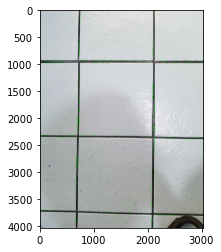

In [10]:
# detect lines in the image using hough lines technique
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 60, np.array([]), 50, 5)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(img, (x1, y1), (x2, y2), (20, 220, 20), 3)
plt.imshow(img)
plt.show()

In [11]:
##################################################################################################################3

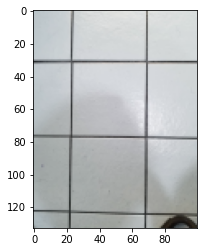

In [12]:
# Here's an approach I found online for detecting shapes


# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread("the_floor.jpg")
resized = imutils.resize(image, width=100)
ratio = image.shape[0] / float(resized.shape[0])
plt.imshow(resized)
plt.show()

In [13]:
# convert the resized image to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(blurred)
plt.show()

NameError: name 'blurred' is not defined

In [ ]:
# blur it slightly
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(blurred)
plt.show()

In [ ]:
# threshhold it (convert to black and white)
# This needs to be adjusted for each individual picture depending on its lighting. Need to find a way to improve it
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)
plt.show()

In [ ]:
# Part of an idea I have to manually reduce noise/solidify lines

whites = 0
zeroes = 0
ones = 0
twos = 0
threes = 0
fours = 0
for i in range(len(thresh)):
    for j in range(len(thresh[1])):
        if thresh[i][j] == 0:
            blackEdges = 4
            if j != 0 and thresh[i][j-1] == 255:
                blackEdges -= 1
            if j != len(thresh[1])-1 and thresh[i][j+1] == 255:
                blackEdges -= 1
            if i != 0 and thresh[i-1][j] == 255:
                blackEdges -= 1
            if i != len(thresh)-1 and thresh[i+1][j] == 255:
                blackEdges -= 1
            if blackEdges == 4:
                fours += 1
            if blackEdges == 3:
                threes += 1
            if blackEdges == 2:
                twos += 1
            if blackEdges == 1:
                ones += 1
            if blackEdges == 0:
                zeroes += 1
        else:
            whites += 1
            
print("Whites",whites)
print("Zeroes",zeroes)
print("Ones",ones)
print("Twos",twos)
print("Threes",threes)
print("Fours",fours)

In [ ]:
biased1 = thresh.copy()
biased2 = thresh.copy()
whited = 999999
while whited > 0:
    biased1 = biased2.copy()
    whited = 0
    for i in range(len(biased1)):
        for j in range(len(biased1[1])):
            if biased1[i][j] == 0:
                blackEdges = 4
                if j != 0 and biased1[i][j-1] == 255:
                    blackEdges -= 1
                if j != len(biased1[1])-1 and biased1[i][j+1] == 255:
                    blackEdges -= 1
                if i != 0 and biased1[i-1][j] == 255:
                    blackEdges -= 1
                if i != len(biased1)-1 and biased1[i+1][j] == 255:
                    blackEdges -= 1
                if blackEdges <= 1:
                    biased2[i][j] = 255
                    whited += 1
                else:
                    biased2[i][j] = 0
            else:
                biased2[i][j] = 255
    print("Whited",whited)

plt.imshow(biased2)
plt.show()

In [ ]:
minline = 

In [ ]:
biased1 = thresh.copy()
biased2 = thresh.copy()
#for repeats in range(10)
whited = 1
while whited > 0:
    biased1 = biased2.copy()
    whited = 0
    for i in range(len(biased1)):
        for j in range(len(biased1[1])):
            if biased1[i][j] == 0:
                if j > 0 and j < len(biased1[1])-2 and biased1[i][j-1] == 255 and biased1[i][j+1] == 0 and biased1[i][j+2] == 0:
                    biased2[i][j] = 255
                    whited += 1
                elif j > 1 and j < len(biased1[1])-1 and biased1[i][j-1] == 0 and biased1[i][j-2] == 0 and biased1[i][j+1] == 255:
                    biased2[i][j] = 255
                    whited += 1
                elif i > 0 and i < len(biased1)-2 and biased1[i-1][j] == 255 and biased1[i+1][j] == 0 and biased1[i+2][j] == 0:
                    biased2[i][j] = 255
                    whited += 1
                elif i > 1 and i < len(biased1)-1 and biased1[i-1][j] == 0 and biased1[i-2][j] == 0 and biased1[i+1][j] == 255:
                    biased2[i][j] = 255
                    whited += 1       
                else:
                    biased2[i][j] = 0
            else:
                biased2[i][j] = 255
    print("Whited",whited)

plt.imshow(biased2)
plt.show()

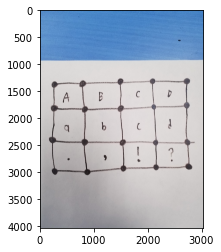

In [3]:
image = cv2.imread("dot_lines_incomplete.jpg")
plt.imshow(image)
plt.show()

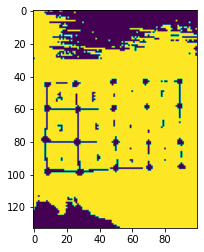

In [3]:
# Picture with dots and lines along the grid

# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread("dot_lines_incomplete.jpg")
resized = imutils.resize(image, width=100)
ratio = image.shape[0] / float(resized.shape[0])
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]
plt.imshow(thresh)
plt.show()

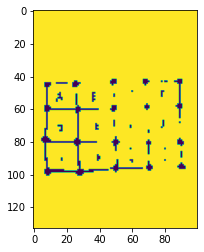

In [12]:
cut = thresh.copy()
for i in range(0,int(thresh.shape[0]*.23)):
    for j in range(thresh.shape[1]):
        cut[i][j] = 255
for i in range(int(thresh.shape[0]*.77),thresh.shape[0]):
    for j in range(thresh.shape[1]):
        cut[i][j] = 255
plt.imshow(cut)
plt.show()

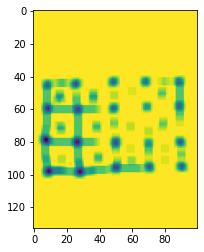

In [17]:
kernel = np.ones((5,5),np.float32)/25
blended = cv2.filter2D(cut,-1,kernel)
plt.imshow(blended)
plt.show()

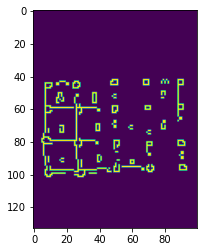

This looks promising! If we are able to more effectively recognize the grid, then this would roughly trace the grid squares. 
The dots are helpful too, since they ensure we can recognize the intersections of lines
Still, improvements definitely need to be made. First things first, a printable grid
Once we get a semi-reliable grid, we could either cut along the lines, or do hough transforms to recognize slants


In [40]:
# perform edge detection
edges = cv2.Canny(blended, 30, 100)
plt.imshow(edges)
plt.show()
print("This looks promising! If we are able to more effectively recognize the grid, then this would roughly trace the grid squares. \nThe dots are helpful too, since they ensure we can recognize the intersections of lines\nStill, improvements definitely need to be made. First things first, a printable grid\nOnce we get a semi-reliable grid, we could either cut along the lines, or do hough transforms to recognize slants")

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0., 255., 255., 255., 255., 255.,   0.],
       [  0., 255.,   0.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0.,   0., 255.,   0.],
       [  0., 255.,   0.,   0.,   0., 255.,   0.],
       [  0., 255., 255., 255., 255., 255.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.]])

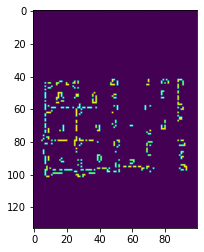

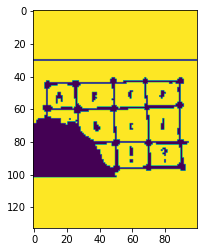

In [95]:
# Picture with dots and lines along the grid

# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread("dot_lines_incomplete.jpg")
resized = imutils.resize(image, width=100)
ratio = image.shape[0] / float(resized.shape[0])
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (7, 7), 0)
thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]
cut = thresh.copy()
top_bound = int(thresh.shape[0]*.23)
bottom_bound = int(thresh.shape[0]*.77)
for i in range(0,top_bound):
    for j in range(thresh.shape[1]):
        cut[i][j] = 255
for i in range(bottom_bound,thresh.shape[0]):
    for j in range(thresh.shape[1]):
        cut[i][j] = 255
plt.imshow(cut)
plt.show()

In [97]:
#sum up the total number of black pixels in each row/column
sumhorizontal = np.zeros(cut.shape[0])
sumvertical = np.zeros(cut.shape[1])
for i in range(0,int(cut.shape[0])):
    for j in range(0,int(cut.shape[1])):
        sumhorizontal[i] += cut[i][j]/255
        sumvertical[j] += cut[i][j]/255
        
#Get rid of sums that are TOO low. They're probably noise, not grid lines
for i in range(len(sumhorizontal)):
    if sumhorizontal[i] < .25 * cut.shape[1]:
        sumhorizontal[i] = 999
for i in range(len(sumvertical)):
    if sumvertical[i] < .25 * cut.shape[0]:
        sumvertical[i] = 999
                
horizontal_lines = 4
horizontal_interval = 10
min_horizontal_positions = np.zeros(horizontal_lines)
for line in range(horizontal_lines):
    min_index = np.argmin(sumhorizontal)
    min_horizontal_positions[line] = min_index
    
    if min_index < horizontal_interval:
        i = 0
    else:
        i = min_index - horizontal_interval
    while i <= min_index + horizontal_interval and i < len(sumhorizontal):
        sumhorizontal[i] = 999
        i += 1
        
vertical_lines = 5
vertical_interval = 10
min_vertical_positions = np.zeros(vertical_lines)
for line in range(vertical_lines):
    min_index = np.argmin(sumvertical)
    min_vertical_positions[line] = min_index
    
    if min_index < vertical_interval:
        i = 0
    else:
        i = min_index - vertical_interval
    while i <= min_index + vertical_interval and i < len(sumvertical):
        sumvertical[i] = 999
        i += 1

min_horizontal_positions = np.sort(min_horizontal_positions).astype(int)
min_vertical_positions = np.sort(min_vertical_positions).astype(int)
min_vertical_positions
    

array([ 8, 26, 49, 70, 89])

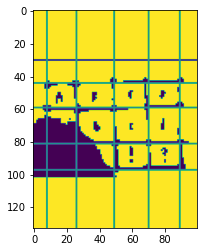

In [98]:
gridded = cut.copy()
for i in min_horizontal_positions:
    for j in range(gridded.shape[1]):
        gridded[i][j] = 130
for j in min_vertical_positions:
    for i in range(gridded.shape[0]):
        gridded[i][j] = 130
        
plt.imshow(gridded)
plt.show()